In [16]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [17]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path('../Starter_Code/Resources/lending_data.csv')
# C:\Users\dgnil\Desktop\Classwork\Week 20 Challenge Supervised Learning\credit-risk-classification\Credit_Risk\Starter_Code\Resources\lending_data.csv
df = pd.read_csv(data)
df.head()

# Review the DataFrame


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [18]:
# Separate the data into labels and features

# Separate the y variable, the labels
y= df["loan_status"]
# Separate the X variable, the features
X= df.drop(columns="loan_status")

In [19]:
# Review the y variable Series
y.shape

(77536,)

In [20]:
# Review the X variable DataFrame
X.shape

(77536, 7)

### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [57]:
# Check the balance of our target values
y.value_counts()


0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [25]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

# Assign a random_state of 1 to the function



---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [45]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model

classifier = LogisticRegression(solver='lbfgs',
                                max_iter = 200,random_state=1)
classifier
# Fit the model using training data

classifier.fit(X_train, y_train)


LogisticRegression(max_iter=200, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [39]:
#Generate training predictions
# predictions = classifier.predict(X_train)
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.tail(10)

,Prediction,Actual
19374,0,0
19375,0,0
19376,0,0
19377,0,0
19378,0,0
19379,0,0
19380,0,0
19381,0,0
19382,0,0
19383,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [30]:
# Print the balanced_accuracy score of the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

#  is this correct?

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [47]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)


0.9918489475856377

In [37]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

[[55994   277]
 [  181  1700]]


In [43]:
# Create and save the testing classification report
target_names = ["loan healthy status", "loan risky status"]
testing_report = classification_report(y_test, predictions, target_names=target_names)

# Print the testing classification report
print(testing_report)

# what is first two lines say?

                     precision    recall  f1-score   support

loan healthy status       1.00      0.99      1.00     18765
  loan risky status       0.85      0.91      0.88       619

           accuracy                           0.99     19384
          macro avg       0.92      0.95      0.94     19384
       weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** When we look at the two classification reports for training and test data set, the model is performing very well on the data set as the acuracy is 0.99.precision and recall is high.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

<Axes: ylabel='loan_status'>

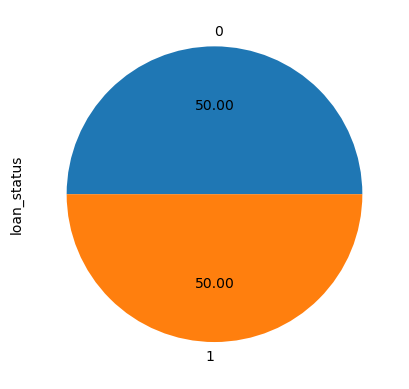

In [64]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros= RandomOverSampler(random_state=1)


# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
y_resampled.value_counts().plot.pie(autopct='%.2f')


In [65]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [77]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
over_classifier = LogisticRegression(solver='lbfgs',
                                max_iter = 200,random_state=1)

over_classifier

# Fit the model using the resampled training data
over_classifier.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
O_predictions = over_classifier.predict(X_test)


# Fit the model using training data
# O_predictions = over_classifier.predict(X_test)
# results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
# results.tail(10)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [80]:
# Print the balanced_accuracy score of the model 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, O_predictions)

0.9938093272802311

In [81]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, O_predictions)

array([[18649,   116],
       [    4,   615]], dtype=int64)

In [87]:
# Print the classification report for the model
target_names = ["loan healthy status", "loan risky status"]
testing_report = classification_report(y_test, O_predictions, target_names=target_names)
print(testing_report)

                     precision    recall  f1-score   support

loan healthy status       1.00      0.99      1.00     18765
  loan risky status       0.84      0.99      0.91       619

           accuracy                           0.99     19384
          macro avg       0.92      0.99      0.95     19384
       weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!